In [1]:
import os

# Local dataset path (already downloaded via Kaggle CLI)
path = "data"

print("Using local dataset path:", path)
print("Files in data folder:", os.listdir(path))


Using local dataset path: data
Files in data folder: ['captions.txt', 'Images']


In [2]:

import pandas as pd

captions_file_path = os.path.join(path, 'captions.txt')
images_folder_path = os.path.join(path, 'Images')

captions_df = pd.read_csv(captions_file_path)
captions_df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [3]:
# Pick 1000 unique images
unique_images = captions_df['image'].unique()
unique_images = unique_images[:1000]
#divided into test and train
train_images = unique_images[:900]
test_images = unique_images[900:1000]
print(f"unique_images: {len(unique_images)}")
print(f"Train Images: {len(train_images)}")
print(f"Test Images: {len(test_images)}")

unique_images: 1000
Train Images: 900
Test Images: 100


In [4]:
# Filter captions dataframe
captions_df = captions_df[captions_df['image'].isin(unique_images)].reset_index(drop=True)

print(f"Selected {len(unique_images)} images")
captions_df.shape
#har ek image k pass 5 captions hai toh 550*5=2750
# captions_df.head()

Selected 1000 images


(5000, 2)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [6]:
def show_img_with_captions(i,image_id):
  img_path = os.path.join(images_folder_path, image_id)
  img = mpimg.imread(img_path)
  captions = captions_df[captions_df['image'] == sample_img]['caption'].values
  print("Image Number: ",i+1,"\n")
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  print("Captions:")
  for j,cap in enumerate(captions):
      print(j+1,cap)
  print()

Image Number:  1 



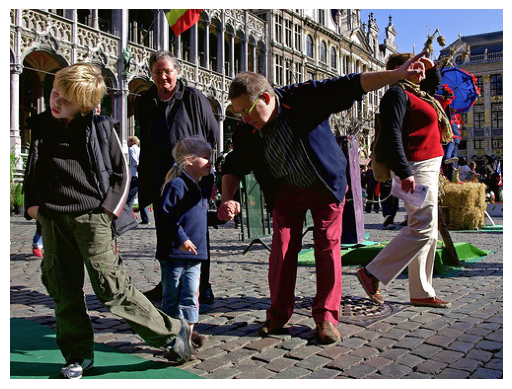

Captions:
1 A crowded street in Europe .
2 A group of adults and children , with one man pointing at something off-camera .
3 A man holding a little girl hand bends over and points something to her .
4 A young girl and an older gentleman hold hands as he points to something off frame .
5 People with small children on a brick ground , one man points to something for a child to see .

Image Number:  2 



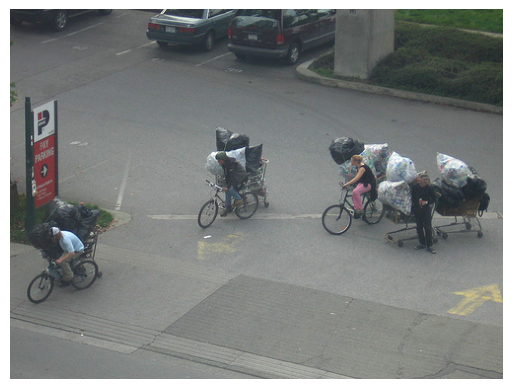

Captions:
1 A group of people ride bikes while holding onto large trash bags .
2 Four people with shopping carts full of bags .
3 People riding bicycles carry large plastic bags full of cans .
4 People transport multiple large trash bags on bicycles and in shopping carts .
5 People traveling with sacks on bikes and carts .

Image Number:  3 



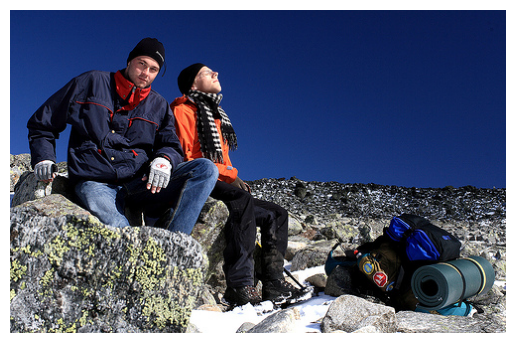

Captions:
1 Two hikers rest on a snow-covered mountain .
2 Two men and a backpack .
3 Two men pause on a rock while hiking in barren terrain .
4 Two men resting uptop a snowy mountain .
5 Two people sitting on rocks and a pack at their feet .

Image Number:  4 



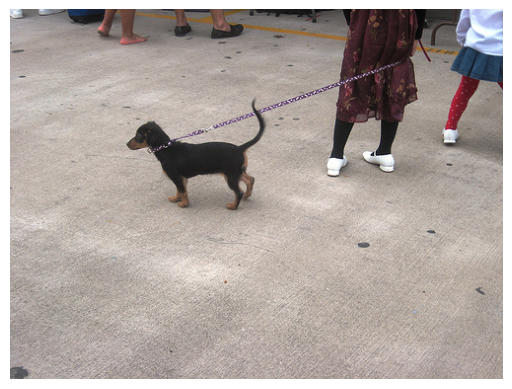

Captions:
1 A dog is on a leash held by a woman in white shoes .
2 A dog with a purple leash is held by a woman wearing white shoes .
3 A small black and tan dog on a leash .
4 A small dog being held on a leash .
5 Small brown dog on leash

Image Number:  5 



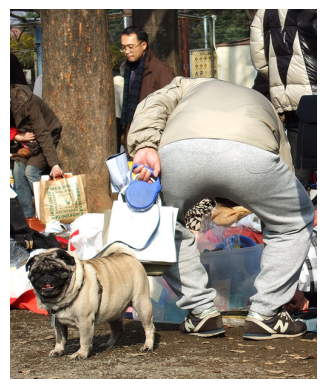

Captions:
1 A dog waits as his owner rummages through a collection of stuff .
2 A man holding the leash of a pug bends down to look in a bin at an outdoor rummage sale .
3 A man with a pug dog bends over to pick something off the sidewalk .
4 A man with a pug on a leash bending down to examine merchandise .
5 A person holding a small dog on a leash is bending over and looking through items .



In [7]:
sample_images = random.sample(list(train_images), 5)

for i,sample_img in enumerate(sample_images):
  show_img_with_captions(i,sample_img)

In [8]:
import numpy as np
import os
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tqdm import tqdm  # ye progress bar show karne k liye hai so that hame pta chalta rahe ki kitna time or legega

/Users/jatinjangra/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [9]:
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Model

# def preprocess_image(image_path):
#     img = load_img(image_path, target_size=(224, 224))
#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = tf.keras.applications.vgg16.preprocess_input(img)
#     return img

# def extract_image_features(model, image_path):
#     img = preprocess_image(image_path)
#     features = model.predict(img, verbose=0)
#     return features

# vgg16_model = VGG16(weights='imagenet', input_shape=(224, 224, 3))

# vgg16_model.layers.pop()

# vgg16_model = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)


In [10]:
# train_image_features, val_image_features, test_image_features = {}, {}, {}  # A Dictionary to store image features with their corresponding IDs

# # Progress bar initialization
# pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

# for caption in all_image_ids:
#     image_id = caption.split('\t')[0]
#     image_path = os.path.join(images_file_path, image_id)

#     # Extract features using VGG16
#     image_features = extract_image_features(vgg16_model, image_path)  # Extracting features using VGG16

#     # Check the dataset (train/val/test) and store features accordingly
#     if image_id in train_image_ids:
#         train_image_features[image_id] = image_features.flatten()  # Flattening the features
#         pbar.update(1)

#     elif image_id in val_image_ids:
#         val_image_features[image_id] = image_features.flatten()  # Flattening the features
#         pbar.update(1)

#     elif image_id in test_image_ids:
#         test_image_features[image_id] = image_features.flatten()  # Flattening the features
#         pbar.update(1)

#     else:
#         print('Unknown image ID!')

# pbar.close()


In [11]:
# Load EfficientNetB0 pre-trained model
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [12]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [13]:
features = {}

for img_name in tqdm(unique_images, desc="Extracting image features"):
    img_path = os.path.join(images_folder_path, img_name)
    img_array = preprocess_image(img_path)
    feature = efficientnet.predict(img_array, verbose=0)
    features[img_name] = feature

Extracting image features: 100%|████████████| 1000/1000 [00:37<00:00, 26.56it/s]


In [14]:
import re

def clean_caption(caption):
    caption = caption.lower()
    caption = re.sub(r"[^a-z]+", " ", caption)
    caption = caption.strip()
    caption = '<startseq> ' + caption + ' <endseq>'
    return caption

captions_df['caption'] = captions_df['caption'].apply(clean_caption)
captions_df.head()


,image,caption
0,1000268201_693b08cb0e.jpg,<startseq> a child in a pink dress is climbing...
1,1000268201_693b08cb0e.jpg,<startseq> a girl going into a wooden building...
2,1000268201_693b08cb0e.jpg,<startseq> a little girl climbing into a woode...
3,1000268201_693b08cb0e.jpg,<startseq> a little girl climbing the stairs t...
4,1000268201_693b08cb0e.jpg,<startseq> a little girl in a pink dress going...


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

all_captions = list(captions_df['caption'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 3214


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Determine the longest caption
max_caption_len = max(len(c.split()) for c in all_captions)
print(f"Max Caption Length: {max_caption_len}")

def generate_training_sequences(tokenizer, max_len, caption_data, image_features):
    visual_input, text_input, output_word = [], [], []

    for _, entry in caption_data.iterrows():
        full_caption = entry['caption']
        image_id = entry['image']
        img_feature = image_features[image_id][0]

        sequence = tokenizer.texts_to_sequences([full_caption])[0]

        for j in range(1, len(sequence)):
            partial_seq = sequence[:j]
            target_word = sequence[j]

            padded_seq = pad_sequences([partial_seq], maxlen=max_len)[0]
            encoded_output = tf.keras.utils.to_categorical([target_word], num_classes=vocab_size)[0]

            visual_input.append(img_feature)
            text_input.append(padded_seq)
            output_word.append(encoded_output)

    return np.array(visual_input), np.array(text_input), np.array(output_word)

X1, X2, y = generate_training_sequences(tokenizer, max_caption_len, captions_df, features)
print(f"Shapes: {X1.shape}, {X2.shape}, {y.shape}")

Max Caption Length: 35
Shapes: (60167, 1280), (60167, 35), (60167, 3214)


In [17]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.models import Model

# Image feature extractor model
inputs1 = Input(shape=(1280,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# Sequence model
inputs2 = Input(shape=(max_caption_len,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

# Decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# Merge it
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1280)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 35, 256)   │    822,784 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1280)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 35, 256)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 35)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    327,936 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3214)      │    825,998 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,567,822 (9.80 MB)

 Trainable params: 2,567,822 (9.80 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [19]:
#training our Model
model.fit([X1, X2], y, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - loss: 5.1021 - val_loss: 4.1408
Epoch 2/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 54s 64ms/step - loss: 3.6417 - val_loss: 3.9931
Epoch 3/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - loss: 3.1257 - val_loss: 3.9746
Epoch 4/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - loss: 2.7376 - val_loss: 4.0554
Epoch 5/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 54s 64ms/step - loss: 2.4084 - val_loss: 4.1852
Epoch 6/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - loss: 2.1420 - val_loss: 4.3788
Epoch 7/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - loss: 1.9281 - val_loss: 4.5571
Epoch 8/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - loss: 1.7328 - val_loss: 4.7766
Epoch 9/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 57s 68ms/step - loss: 1.5951 - val_loss: 4.9171
Epoch 10/10
847/847 ━━━━━━━━━━━━━━━━━━━━ 53s 62ms/step - loss: 1.4677 - val_loss: 5.1215


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [ ]:
def generate_caption(model, tokenizer, photo, max_length):
    in_text = 'startseq'  # Start the caption sequence

    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]  # Convert text to sequence
        sequence = pad_sequences([sequence], maxlen=max_length)  # Pad sequence to max length

        # Predict next word
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)  # Get word with highest probability

        word = tokenizer.index_word.get(yhat, None)  # Get word from index

        if word is None:  # If no word is found, break
            break
        in_text += ' ' + word  # Append predicted word to caption

        if word == 'endseq':  # Stop if 'endseq' is predicted
            break

    return in_text

In [ ]:
import pyttsx3
def generate_speech(model, tokenizer, photo, max_length):
    captions = generate_caption(model, tokenizer, photo, max_length)
    caption = caption.replace('startseq', '').replace('endseq', '').strip()
    pyttsx3.speak(captions)

In [ ]:
# Combine test images and trained images
combined_images =list(unique_images)

# Select 5 random images from the combined list
random_test_imgs = random.sample(combined_images, 5)

In [ ]:
# Loop through each random test image
for img_name in random_test_imgs:
    img_path = os.path.join(images_folder_path, img_name)  # Get image path

    # Preprocess the image and extract feature
    img_array = preprocess_image(img_path)
    feature = efficientnet.predict(img_array, verbose=0)  # Get feature from the model

    # Generate caption for the image
    caption = generate_caption(model, tokenizer, feature, max_caption_len)

    # Clean up the generated caption
    caption = caption.replace('startseq', '').replace('endseq', '').strip()

    # Display the image and its caption
    plt.figure(figsize=(6, 6))
    plt.imshow(mpimg.imread(img_path))
    plt.axis('off')
    plt.title(caption, fontsize=12)
    plt.show()


In [ ]:
# Loop through each random test image
for img_name in random_test_imgs:
    img_path = os.path.join(images_folder_path, img_name)  # Get image path

    # Preprocess the image and extract feature
    img_array = preprocess_image(img_path)
    feature = efficientnet.predict(img_array, verbose=0)  # Get feature from the model

    # Generate caption for the image
    generate_speech(model, tokenizer, feature, max_caption_len)

In [20]:
# Save trained image captioning model
model.save("image_caption_model.h5")
print("✅ Model saved")


✅ Model saved


In [21]:
# Save model in new Keras format (optional)
model.save("image_caption_model.keras")
print("✅ Model saved in Keras format")



✅ Model saved in Keras format


In [22]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("✅ Tokenizer saved")


✅ Tokenizer saved
